 - Consistency
 - Inspection
 - Limitted object hierarchy   
 - Composistion
 - Useful defaults

### Basics of scikit API

1. Choose a model 
2. Choosing parameters
3. Data manipulations, matrix, array functions
4. Model fitting
5. Predict

n1 = 1000 # number of cars
cb1 = 1000000 # number of CO2 molecules in a cubic meter of air

n2 = 2000
cb2 = 1900000

cb ~= n 

# Supervised Learning with Scikit-Learn

## Supervised model 

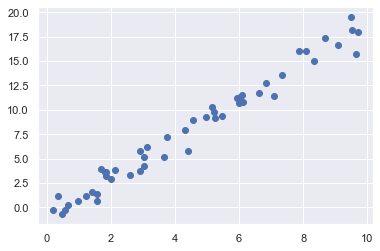

In [59]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.RandomState(42)

x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [60]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

## Linear Regression

In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression(fit_intercept=True)

In [64]:
x

array([3.74540119, 9.50714306, 7.31993942, 5.98658484, 1.5601864 ,
       1.5599452 , 0.58083612, 8.66176146, 6.01115012, 7.08072578,
       0.20584494, 9.69909852, 8.32442641, 2.12339111, 1.81824967,
       1.8340451 , 3.04242243, 5.24756432, 4.31945019, 2.9122914 ,
       6.11852895, 1.39493861, 2.92144649, 3.66361843, 4.56069984,
       7.85175961, 1.99673782, 5.14234438, 5.92414569, 0.46450413,
       6.07544852, 1.70524124, 0.65051593, 9.48885537, 9.65632033,
       8.08397348, 3.04613769, 0.97672114, 6.84233027, 4.40152494,
       1.22038235, 4.9517691 , 0.34388521, 9.09320402, 2.58779982,
       6.62522284, 3.11711076, 5.20068021, 5.46710279, 1.84854456])

In [65]:
X = x[:, np.newaxis]

In [66]:
X.shape

(50, 1)

In [67]:
x.shape

(50,)

In [68]:
model.fit(X, y)

LinearRegression()

In [69]:
model.coef_

array([1.9776566])

In [70]:
model.intercept_

-0.9033107255311146

In [71]:
xfit = np.linspace(-1, 1)

In [72]:
xfit

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

In [73]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

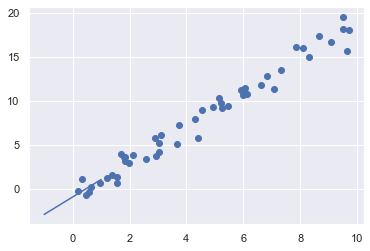

In [74]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

## Naive bayes

In [85]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import ssl
ssl._create_default_https_context = ssl._create_unverified_context
iris = sns.load_dataset('iris')

X_iris = iris.drop('species', axis=1) # pandas
y_iris = iris['species']

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

54     versicolor
108     virginica
112     virginica
17         setosa
119     virginica
          ...    
133     virginica
137     virginica
72     versicolor
140     virginica
37         setosa
Name: species, Length: 112, dtype: object

## Typical machine learning workflow

In [87]:
from sklearn.naive_bayes import GaussianNB # 1. Importing and Choosing a model from scikit
model = GaussianNB()                       # 2. Instantiate model
model.fit(Xtrain, ytrain)                  # 3. Fit model to data   
y_model = model.predict(Xtest)             # 4. Predict on new data 

### Check accuracy

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning

In [96]:
from sklearn.decomposition import PCA # 1
model = PCA(n_components=2) # 2
model.fit(X_iris)
X_2D = model.transform(X_iris)

In [100]:
X_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [97]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [98]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

In [99]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755


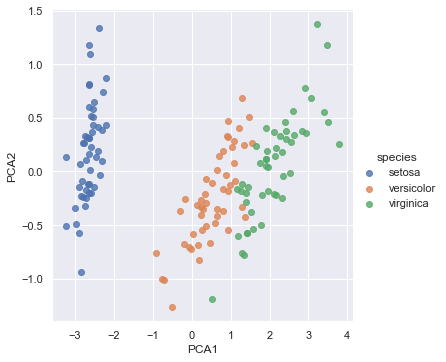

In [107]:
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False)

In [111]:
# Gaussian Mixture Model
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')
model.fit(X_iris)
y_gmm = model.predict(X_iris)

/Users/blgnmu/private/nordic/DSB-JUNE19/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


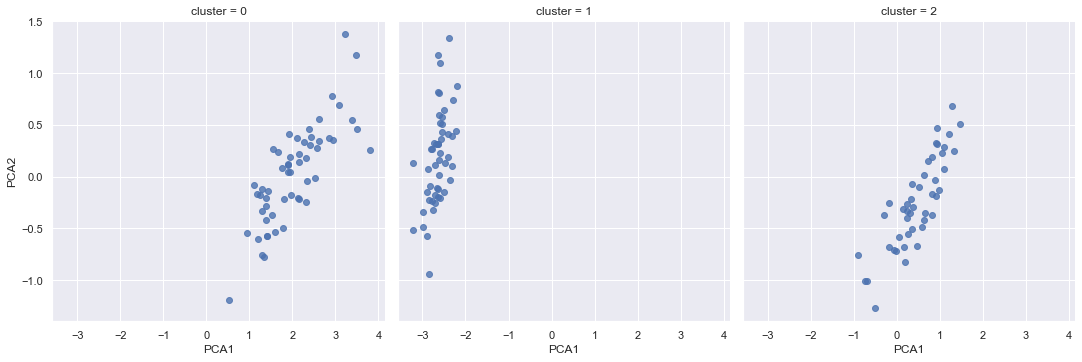

In [112]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, col='cluster', fit_reg=False)

/Users/blgnmu/private/nordic/DSB-JUNE19/venv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


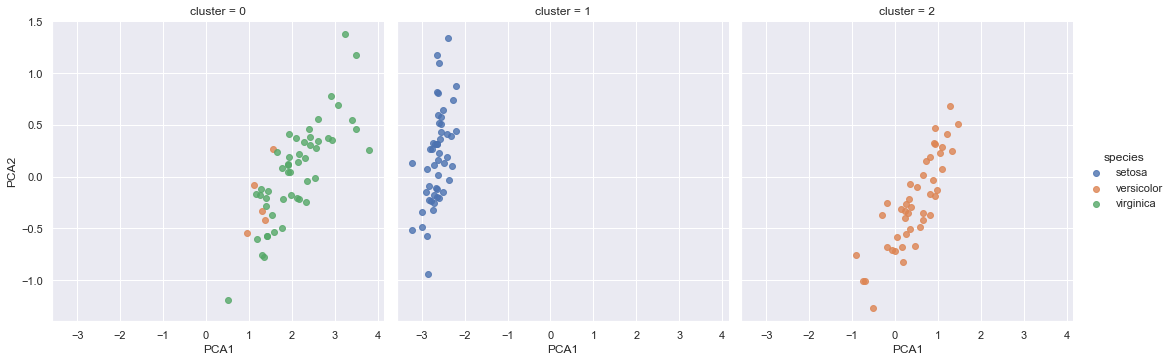

In [114]:
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

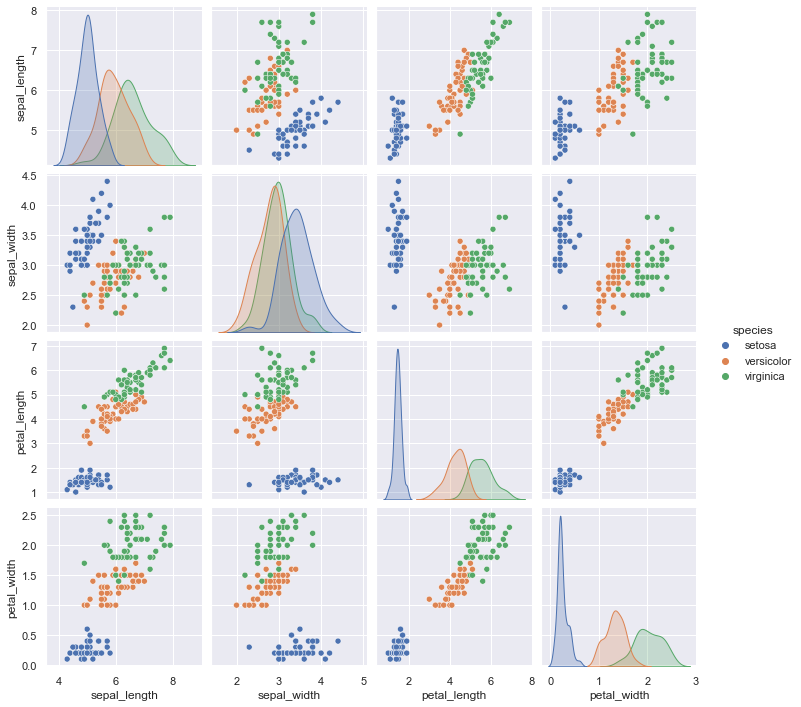

In [119]:
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')

## Hand written digits

In [120]:
from sklearn.datasets import load_digits
digits = load_digits()

In [121]:
digits.images.shape

(1797, 8, 8)

In [138]:
def e(a,b):
    return a ** 2, b ** 2

b = e(3, 4)
type(b)

tuple

5


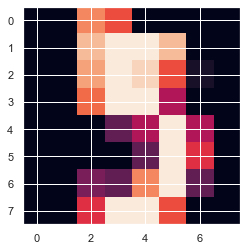

In [159]:
plt.imshow(digits.images[5])
print(digits.target[5])

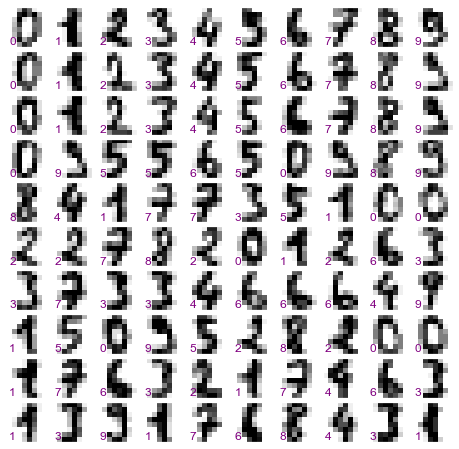

In [158]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks': []},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for ind, ax in enumerate(axes.flat):
    ax.imshow(digits.images[ind], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[ind]),
           transform=ax.transAxes, color='purple')

In [141]:
X = digits.data
X.shape

(1797, 64)

In [132]:
y = digits.target
y.shape

(1797,)

In [163]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)

In [165]:
data_projected

array([[ 167.62807583,   23.11320247],
       [ -47.9701441 ,   51.23937023],
       [-100.20186582,   25.91117683],
       ...,
       [ -51.29824016,  -23.37403466],
       [   0.22685295,  -72.97531198],
       [ -10.77128011,  -35.87036296]])

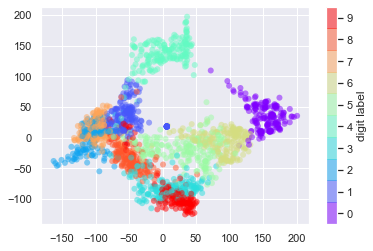

In [170]:
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5, cmap=plt.get_cmap('rainbow', 10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [171]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=8) 

In [173]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(ytest, y_model)

0.8133333333333334

In [176]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

In [177]:
mat

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  9, 20,  0,  0,  0,  0,  0, 15,  0],
       [ 0,  2,  1, 36,  0,  2,  0,  3,  5,  2],
       [ 1,  0,  0,  0, 28,  1,  1,  3,  2,  0],
       [ 0,  0,  0,  1,  0, 51,  0,  2,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0, 11,  0,  0,  0,  2,  0,  0, 28,  0],
       [ 0,  4,  0,  0,  1,  0,  0,  5,  5, 26]])

Text(89.18, 0.5, 'Actual Value')

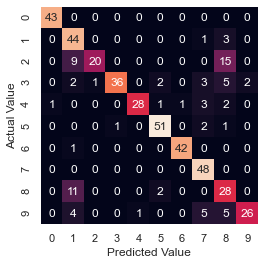

In [180]:
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')